In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
#import the contiguity matrix into the python
#csv
#data = pd.read_excel(r'C:\Users\Elif Goksu Ozturk\Google Drive\PhD kaynak\Thesis (3rd and 4th years)\HDI_data\INDEX_longversion.xlsx')
data = pd.read_excel(r"C:\Users\Elif Goksu Ozturk\Google Drive\PhD kaynak\Thesis (3rd and 4th years)\HDI_data\HDI_dimensions_cleaned.xlsx")

data['year']=data['year'].astype(str)
data['year'].dtype

dtype('O')

In [3]:
#geometric mean for education

data['Edu_gm'] = (data['ME']*data['EE'])**(1/2)



In [4]:
#taking the yearly data

data_2018=data.loc[data.loc[:,'year']==str(2018), : ]
data_2018

,cntry,year,Country,EE,HE,GNI,ME,Edu_gm
16,AF,2018,Afghanistan,10.1,64.5,1746,3.9,6.276145
35,AL,2018,Albania,15.2,78.5,12300,10.1,12.390319
54,DZ,2018,Algeria,14.7,76.7,13639,8.0,10.844353
73,AD,2018,Andorra,13.3,81.8,48641,10.2,11.647317
92,AO,2018,Angola,11.8,60.8,5555,5.1,7.757577
...,...,...,...,...,...,...,...,...
3401,VE,2018,Venezuela (Bolivarian Republic of),12.8,72.1,9070,10.3,11.482160
3420,VN,2018,Viet Nam,12.7,75.3,6220,8.2,10.204901
3439,YE,2018,Yemen,8.7,66.1,1433,3.2,5.276362
3458,ZM,2018,Zambia,12.1,63.5,3582,7.1,9.268765


In [5]:
len(data_2018['Country'])


188

In [6]:
data_2018['index_year'] = data_2018['Country'].rank()-1

C:\Users\Elif Goksu Ozturk\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
#setting the frontiers for three criteria


def fast_non_dominated_sort(c1, c2, c3):
    S=[[] for i in range(0, len(c1))]
    front = [[]]
    n=[0 for i in range(0, len(c1))]
    rank = [0 for i in range(0, len(c1))]

    for p in range(0, len(c1)):
        #if corr1 <=0.90 and corr2 <=0.90 and corr3 <=0.90:
        S[p]=[]
        n[p]=0
        for q in range(0, len(c1)):
            if (c1[p] > c1[q] and c2[p] > c2[q] and c3[p] > c3[q]) or (c1[p] >= c1[q] and c2[p] > c2[q] and c3[p] > c3[q]) or (c1[p] > c1[q] and c2[p] >= c2[q] and c3[p] > c3[q]) or (c1[p] > c1[q] and c2[p] > c2[q] and c3[p] >= c3[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (c1[q] > c1[p] and c2[q] > c2[p] and c3[q] > c3[p]) or (c1[q] >= c1[p] and c2[q] > c2[p] and c3[q] > c3[p]) or (c1[q] > c1[p] and c2[q] >= c2[p] and c3[q] > c3[p]) or (c1[q] > c1[p] and c2[q] > c2[p] and c3[q] >= c3[p]):
                n[p] += 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front


#Function to find index of list
def index_of(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

#Function to sort by values
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))
        values[index_of(min(values),values)] = math.inf
    return sorted_list




Education=list(data_2018['Edu_gm'])
Health=list(data_2018['HE'])
Income=list(data_2018['GNI'])


frontiers_2018 = fast_non_dominated_sort(Education[:], Health[:], Income[:])
frontiers_2018_df=pd.DataFrame(frontiers_2018)

frontiers_2018_df.to_excel((r'C:\Users\Elif Goksu Ozturk\Google Drive\PhD kaynak\Thesis (3rd and 4th years)\paper2&paper3\python\results\FrontierSet_2018_lixo.xlsx'))
#print(frontiers_2017_df)


frontiers_2018

[[8, 46, 64, 74, 76, 81, 99, 126, 138, 152, 162, 163],
 [85, 59, 122, 121, 179, 24, 101, 177, 16, 31, 82, 90],
 [60, 83, 158, 9, 91, 3, 147, 178, 66, 107],
 [12, 100, 127, 154, 44, 137],
 [45, 34, 40],
 [55, 153, 14, 43],
 [94, 136, 11, 171, 95, 105],
 [1, 6, 15, 42, 63, 75, 87, 104, 129, 140, 173],
 [115, 131, 180, 25, 79, 139, 150, 142, 5],
 [149, 159, 48, 2, 21, 36, 176, 110, 111, 167],
 [7, 23, 58, 67, 50, 134, 170, 10, 53, 22, 174, 35, 49],
 [108,
  92,
  113,
  114,
  156,
  181,
  17,
  84,
  145,
  183,
  86,
  143,
  135,
  144,
  161,
  61,
  80,
  133,
  172],
 [20, 130, 78, 98, 52, 116, 184],
 [165, 71, 51, 28, 68, 73, 123],
 [19, 77, 89, 119, 168, 13, 65, 146, 155, 182],
 [38, 93, 112, 56, 29, 120, 164],
 [4, 118, 128, 88, 102, 186, 187, 125, 148, 141],
 [41, 132, 47, 109, 160, 37, 166, 30, 175, 185],
 [57, 72, 103, 0, 18, 69, 96, 39, 169],
 [54, 97, 62, 106, 70, 151],
 [26, 124, 27, 117, 33, 157],
 [32]]

In [8]:

# Plot progress
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.cm as cm
#xs = function1
#ys = function2
#zs = function3





In [9]:
edu=[]
hea=[]
inc=[]
for i in frontiers_2018[0]:
    eu=[Education[i]]
    ha = [Health[i]]
    ic=[Income[i]]
    edu.append(eu)
    hea.append(ha)
    inc.append(ic)

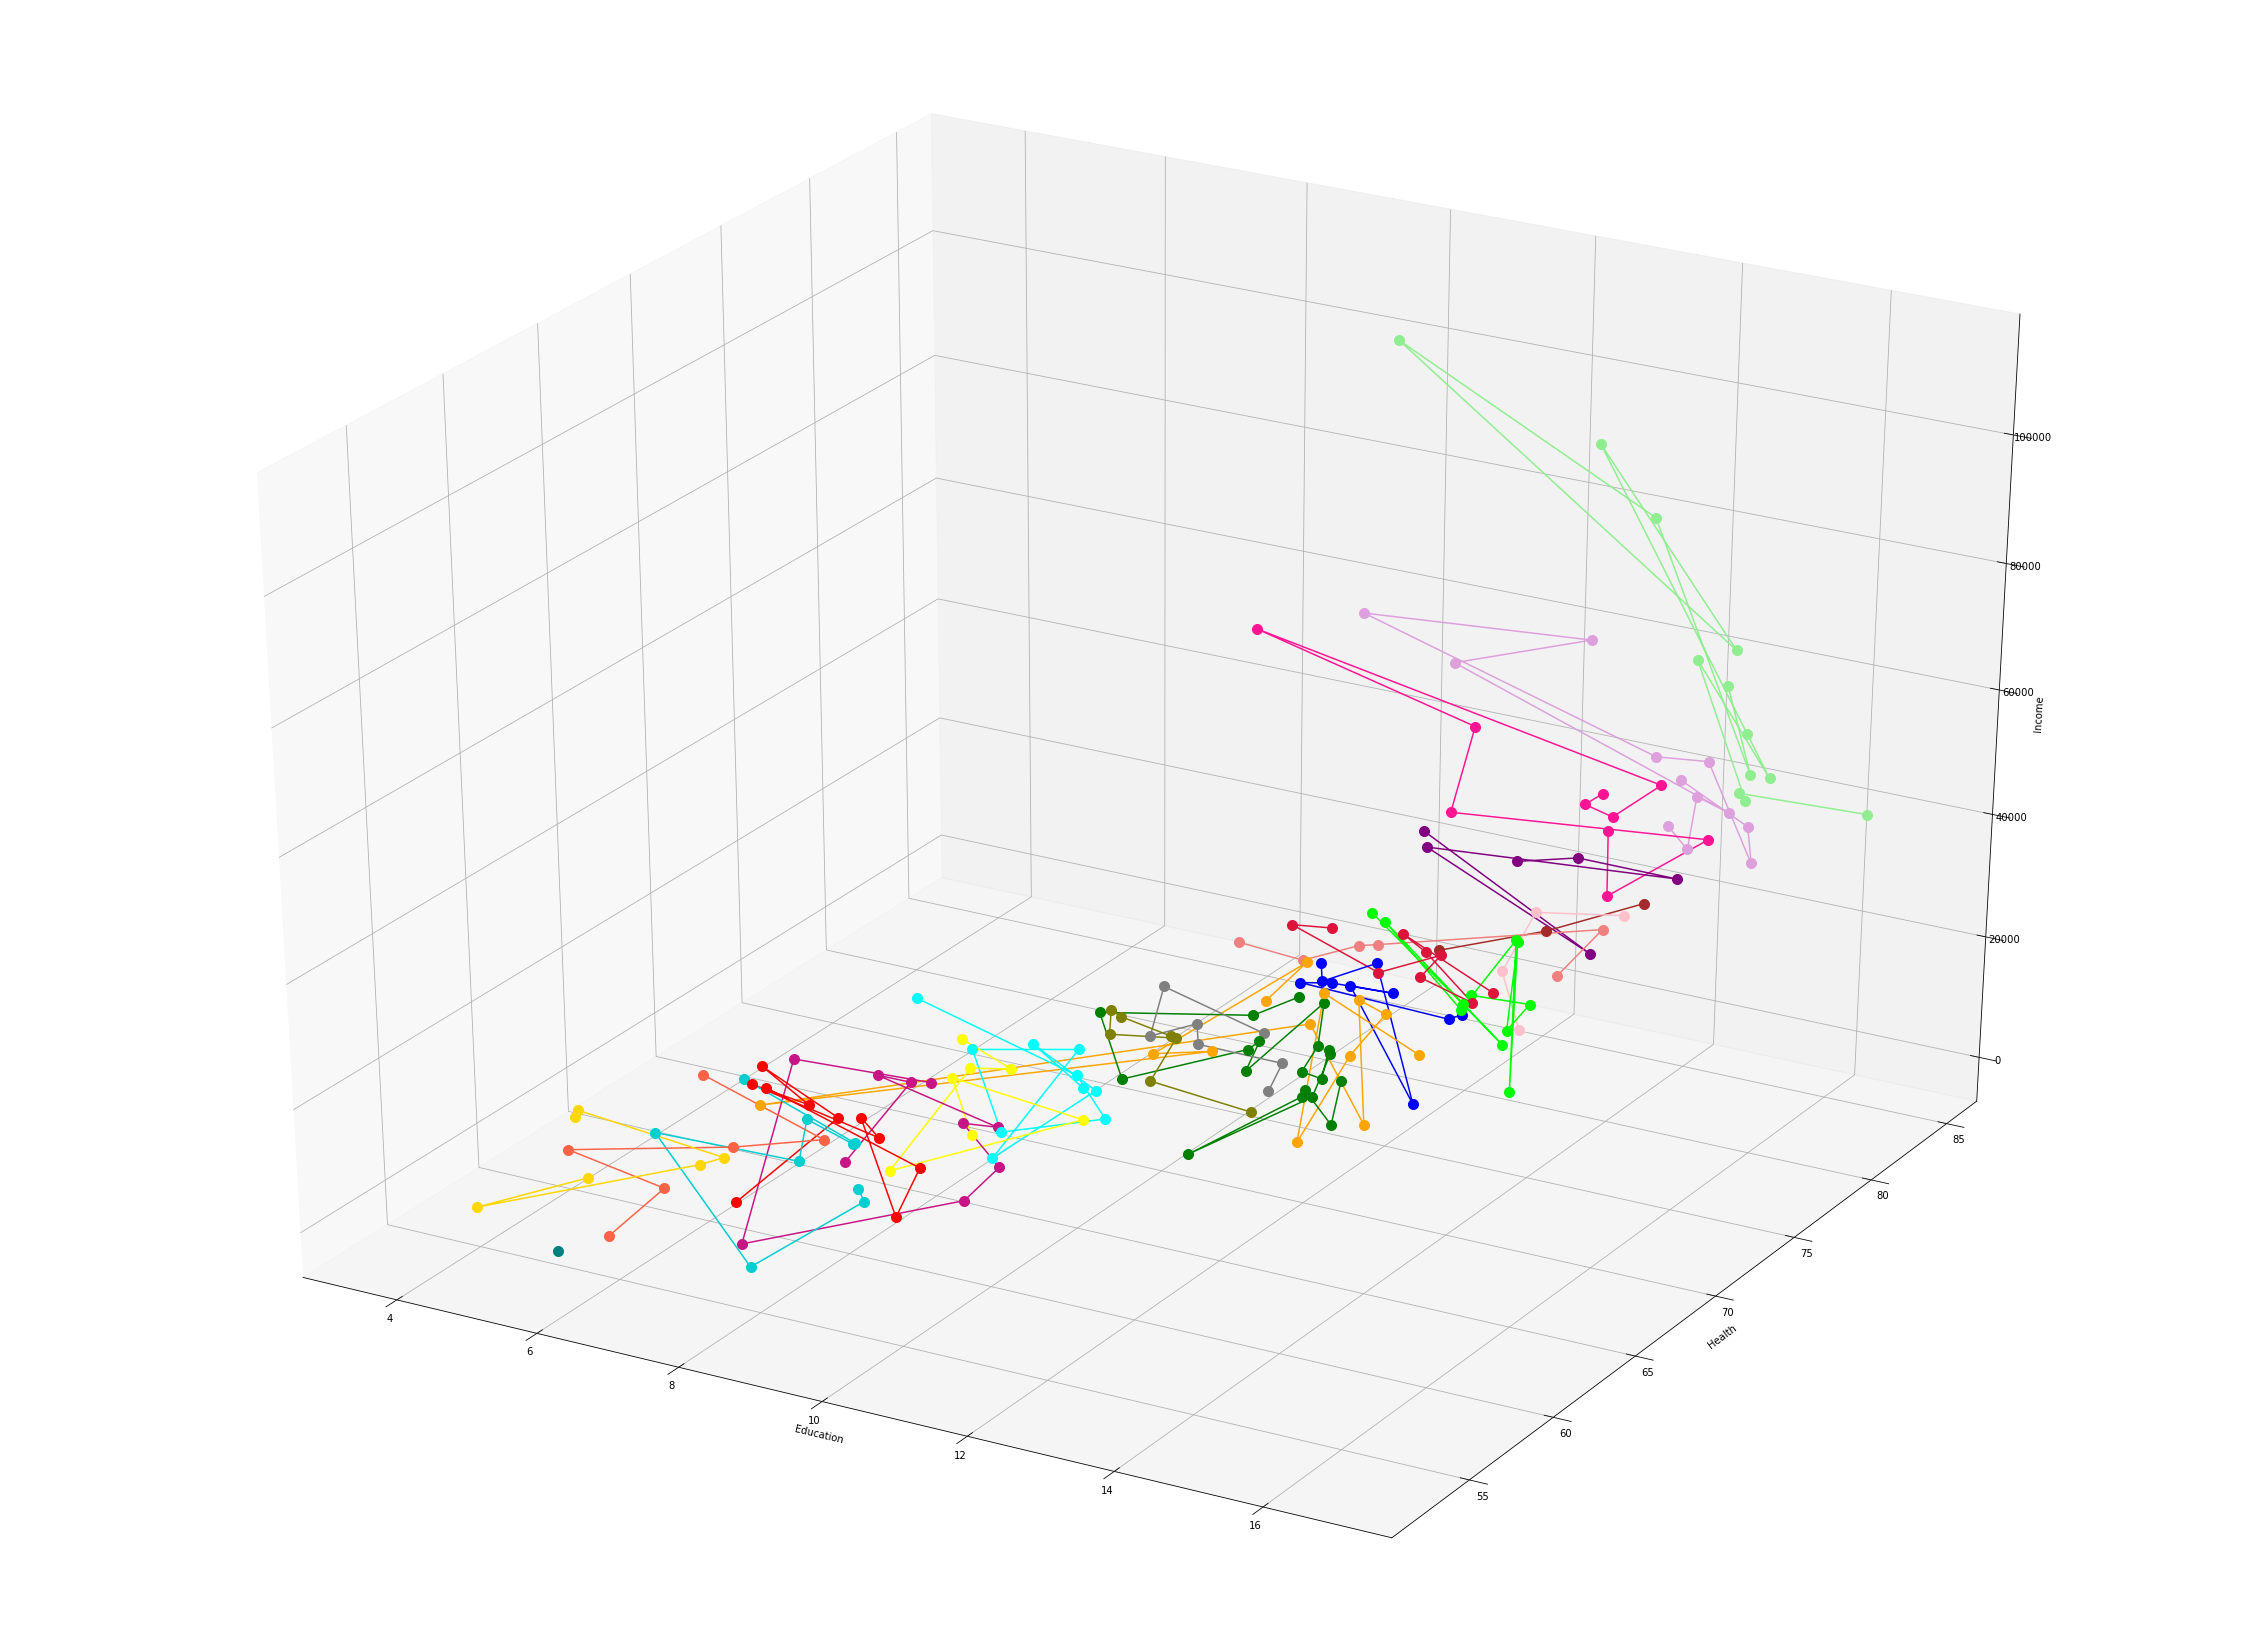

In [10]:

#visualization
fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(111, projection='3d')

#colors = cm.rainbow(np.linspace(0, 1, len(frontiers_2018)))
colors = ['lightgreen', 'plum', 'deeppink', 'purple', 'brown', 'pink', 'lightcoral', 'lime', 'crimson','blue', 'orange', 'green', 'gray', 'olive', 'cyan', 'yellow', 'mediumvioletred', 'red', 'darkturquoise', 'tomato', 'gold', 'teal', 'indigo', 'lightsteelblue', 'tan', 'aquamarine', 'lawngreen', 'fuchsia', 'bisque', 'seagreen']


for l in range(len(frontiers_2018)):
    col = colors[l]
    edu=[]
    hea=[]
    inc=[]
    for point in frontiers_2018[l]:
        eu=Education[point]
        ha = Health[point]
        ic=Income[point]
        edu.append(eu)
        hea.append(ha)
        inc.append(ic)
        ax.scatter(Education[point], Health[point], Income[point], s=100, color=col)
    ax.plot3D(edu, hea, inc, color=col)



ax.set_xlabel('Education')
ax.set_ylabel('Health')
ax.set_zlabel('Income')


plt.show()

In [45]:
#but map does not work

import folium
from folium.plugins import *
import json



In [51]:
ranking = pd.read_excel(r"C:\Users\Elif Goksu Ozturk\Google Drive\PhD kaynak\Thesis (3rd and 4th years)\paper2&paper3\ranks_2018.xlsx")

ranking['year']=ranking['year'].astype(str)
ranking['year'].dtype

Projection = ranking['xb2018']

Projection[0]

40.056148529052734

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

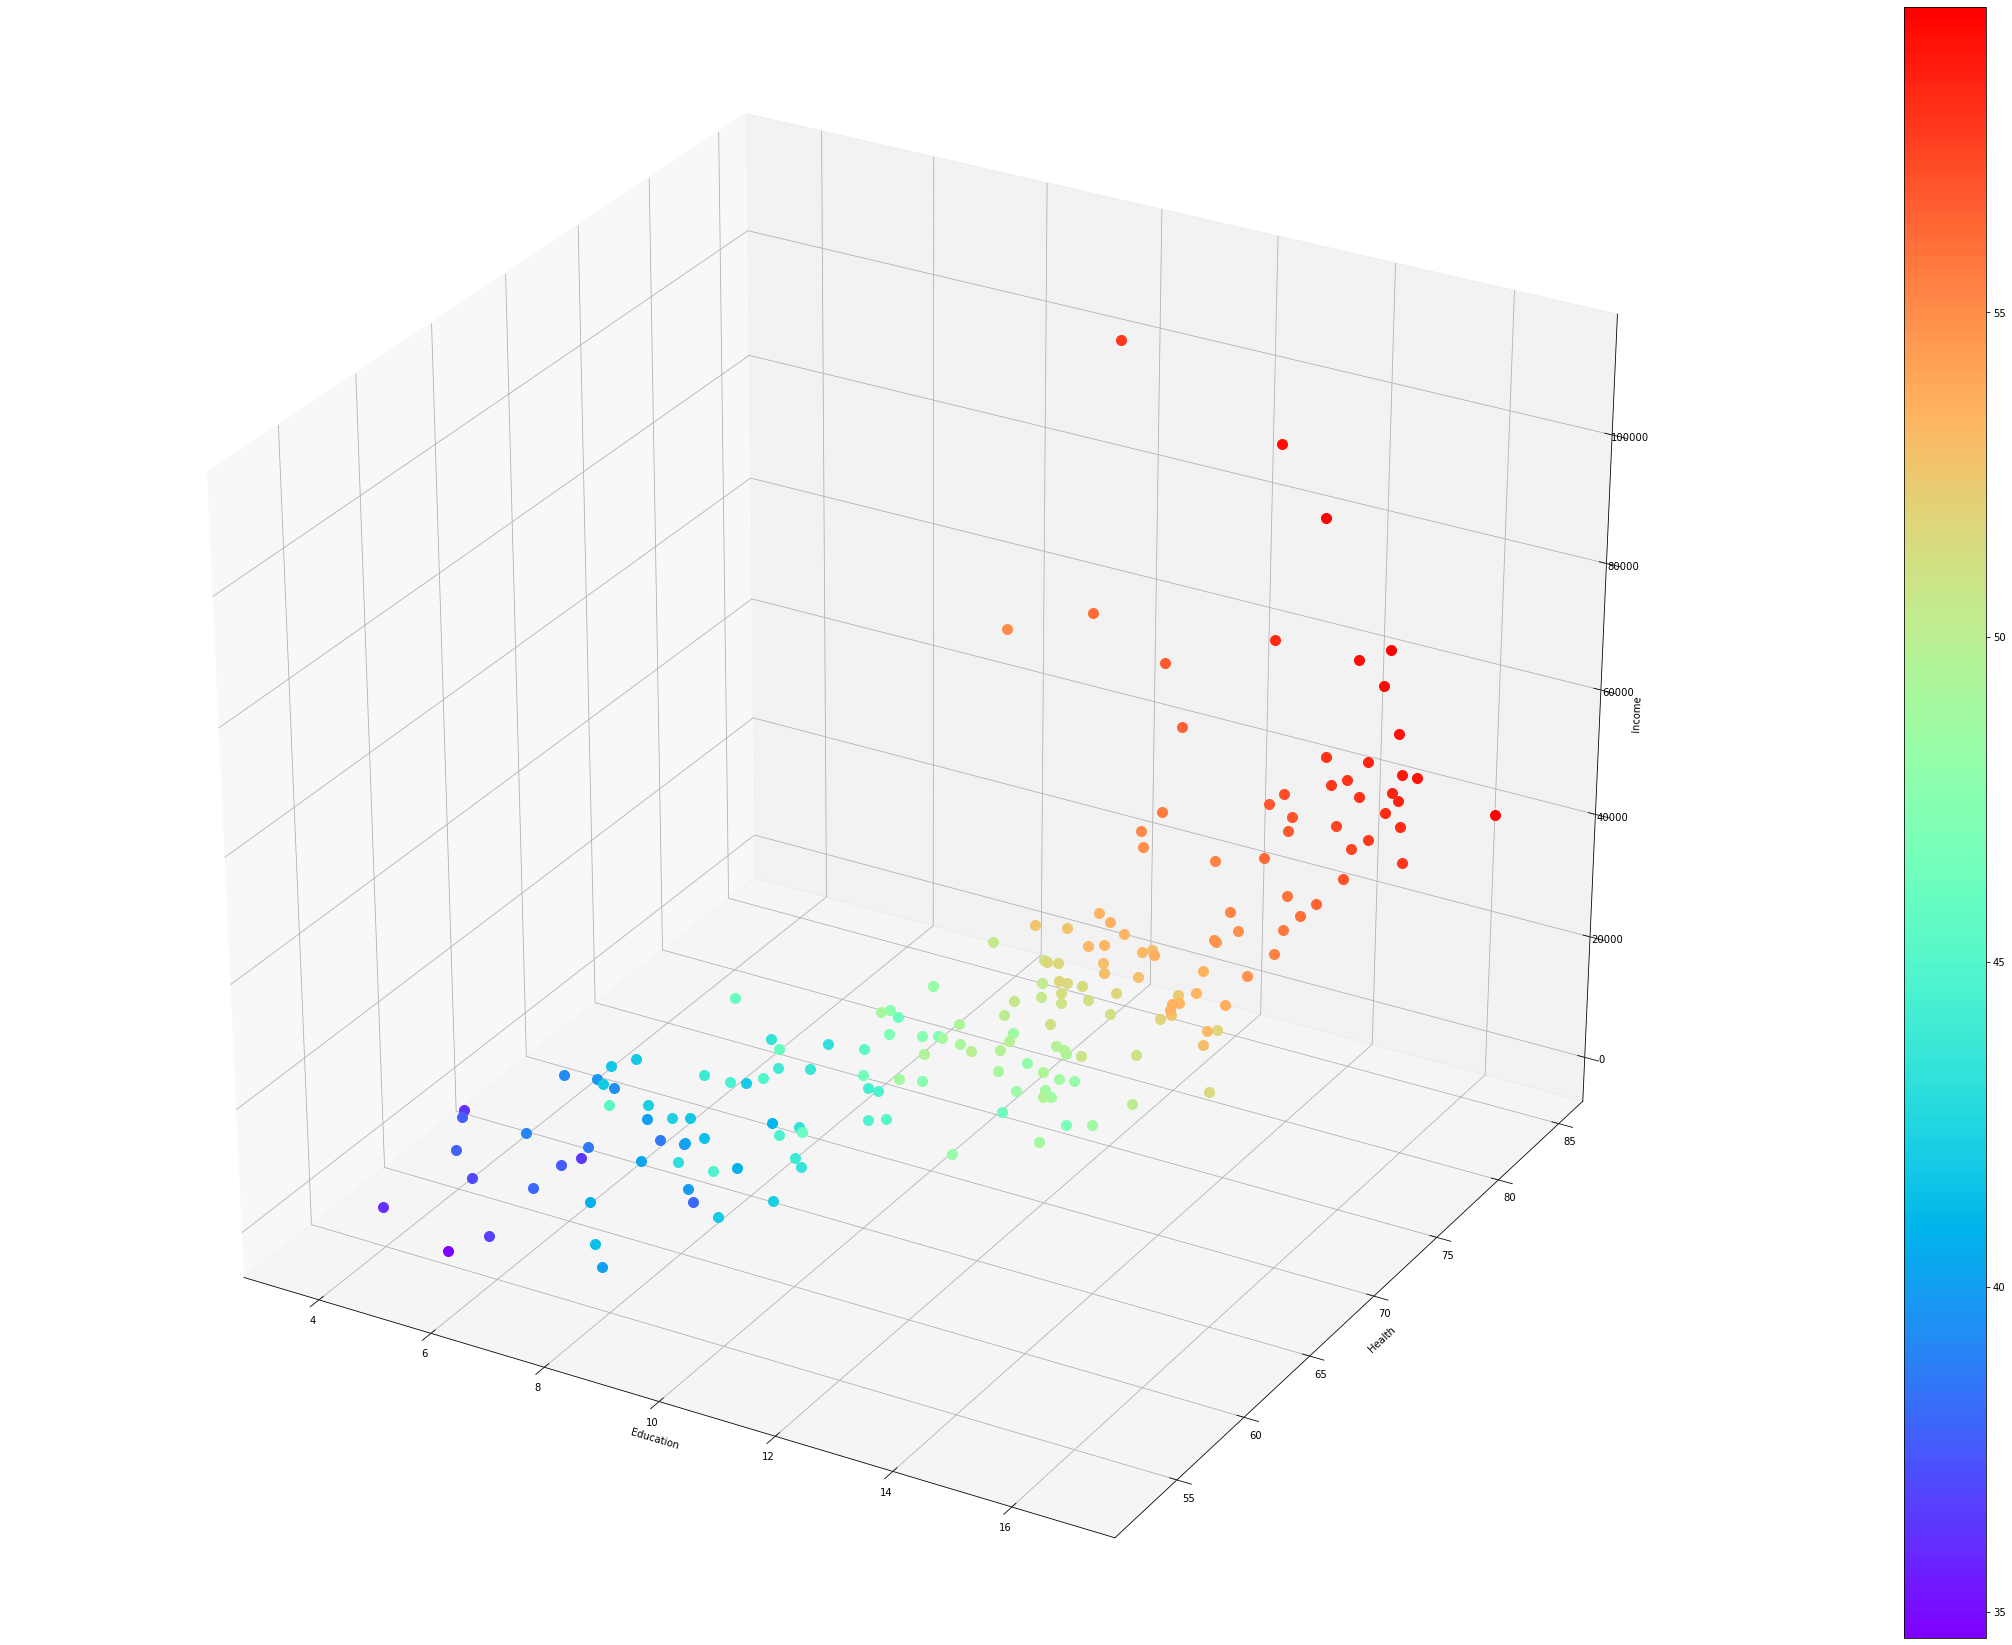

In [52]:
import matplotlib.colors
#visualization
fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(111, projection='3d')

colors = cm.rainbow(np.linspace(0, 1, len(frontiers_2018)))
#colors = ['lightgreen', 'plum', 'deeppink', 'purple', 'brown', 'pink', 'lightcoral', 'lime', 'crimson','blue', 'orange', 'green', 'gray', 'olive', 'cyan', 'yellow', 'mediumvioletred', 'red', 'darkturquoise', 'tomato', 'gold', 'teal', 'indigo', 'lightsteelblue', 'tan', 'aquamarine', 'lawngreen', 'fuchsia', 'bisque', 'seagreen']
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=min(Projection), vmax=max(Projection))

for l in range(len(frontiers_2018)):
    for point in frontiers_2018[l]:
        ax.scatter(Education[point], Health[point], Income[point], s=100, c=cmap(norm(Projection[point])))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)


ax.set_xlabel('Education')
ax.set_ylabel('Health')
ax.set_zlabel('Income')

plt.show()

In [55]:
# #visualization
# fig = plt.figure(figsize=(40,30))
# ax = fig.add_subplot(111, projection='3d')

# colors = cm.rainbow(np.linspace(0, 1, len(frontiers_2018)))
# #colors = ['lightgreen', 'plum', 'deeppink', 'purple', 'brown', 'pink', 'lightcoral', 'lime', 'crimson','blue', 'orange', 'green', 'gray', 'olive', 'cyan', 'yellow', 'mediumvioletred', 'red', 'darkturquoise', 'tomato', 'gold', 'teal', 'indigo', 'lightsteelblue', 'tan', 'aquamarine', 'lawngreen', 'fuchsia', 'bisque', 'seagreen']
# cmap = plt.cm.rainbow
# norm = matplotlib.colors.Normalize(vmin=min(Projection), vmax=max(Projection))

# for l in range(len(frontiers_2018)):
#     col = colors[l]
#     edu=[]
#     hea=[]
#     inc=[]
#     for point in frontiers_2018[l]:
#         eu=Education[point]
#         ha = Health[point]
#         ic=Income[point]
#         edu.append(eu)
#         hea.append(ha)
#         inc.append(ic)
#         ax.scatter(Education[point], Health[point], Income[point], s=100, color=cmap(norm(Projection[point])))
#     ax.plot3D(edu, hea, inc, color=col)

# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# fig.colorbar(sm)

# ax.set_xlabel('Education')
# ax.set_ylabel('Health')
# ax.set_zlabel('Income')


# plt.show()

In [20]:

# world_map = folium.Map(
#     zoom_start=2,
#     tiles='Mapbox Bright'
# )

# world_map

# world_geo = r'world-countries.json'


# world_map.choropleth(
#     geo_data=world_geo,
#     data=ranking,
#     columns=['Country', 'Proposed_index'],
#     key_on='feature.properties.name',
#     fill_color='YlOrRd',
#     legend_name='Human Development Level',
# )

# # world_map

In [16]:
#Correlation between HDI and my model

from scipy import stats



In [17]:
#ranking_2018=ranking.loc[ranking.loc[:,'Year']==str(2018), : ]

corr_2018=stats.spearmanr(ranking['HDI_Rank'], ranking['rank_for_socres'])

corr_2018

SpearmanrResult(correlation=0.9960790690353455, pvalue=7.41332290434678e-198)

In [18]:
countries=[]
for i in range(len(ranking['Country'])):
    c=ranking['Country'].iloc[i]
    countries.append(c)


HDI=[]
for j in range(len(ranking['HDI_Rank'])):
    h=int(ranking['HDI_Rank'].iloc[j])
    HDI.append(h)

MULT=[]
for k in range(len(ranking['rank_for_socres'])):
    m=int(ranking['rank_for_socres'].iloc[k])
    MULT.append(m)

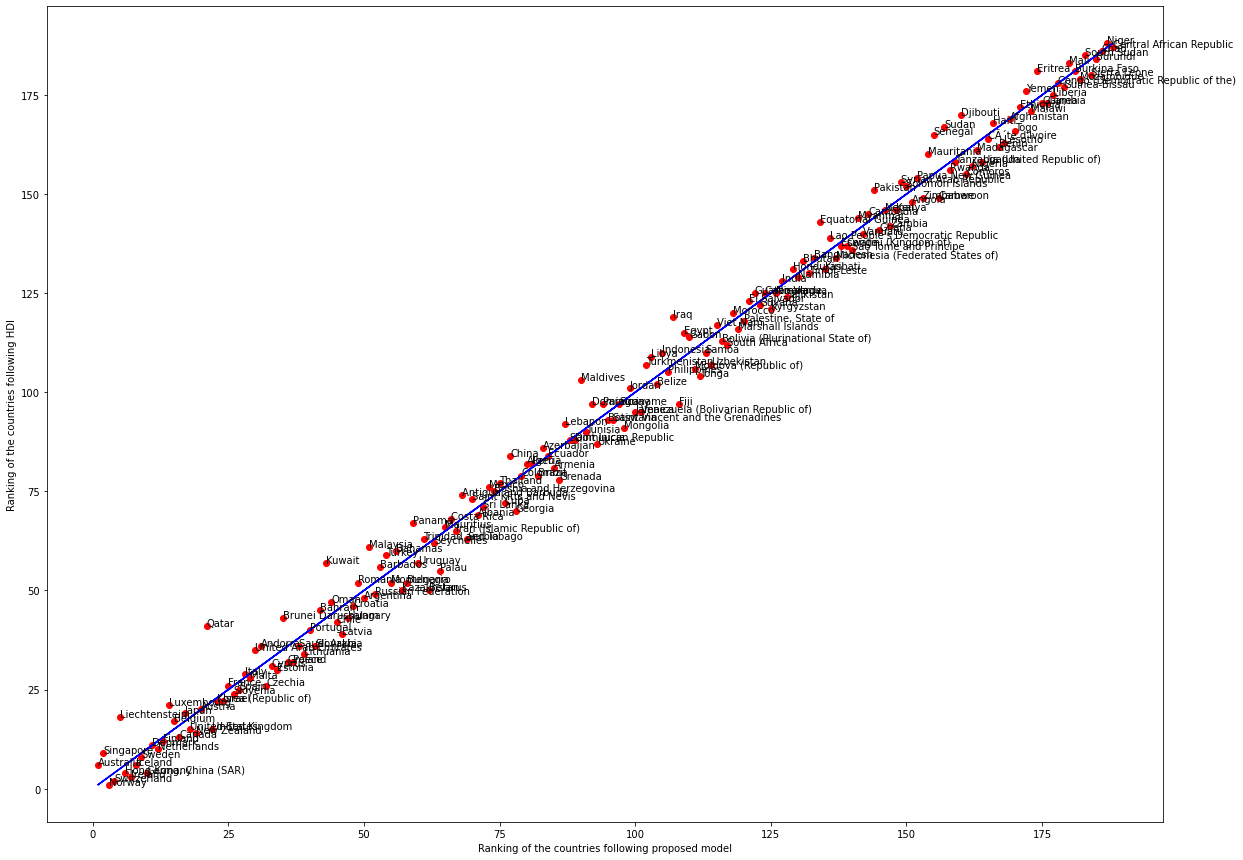

In [19]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(20, 15))

# plt.scatter(ranking_2018['HDI_rank'], ranking_2018['Proposed_rank'], c='g')
plt.plot(ranking['HDI_Rank'], ranking['HDI_Rank'], c='b')
for o in range(len(countries)): 
    plt.scatter(MULT[o], HDI[o], c='r')
    plt.text(MULT[o], HDI[o], countries[o])
plt.xlabel("Ranking of the countries following proposed model")
plt.ylabel("Ranking of the countries following HDI")
plt.show()




